# Predicting Heart Disease using Machine Learning

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


In [ ]:
data_null = pd.read_csv('/content/heart_disease_missing_data.csv')

In [ ]:
data_null.head()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,13693.0,2.0,43.0,10.0,5.00,96.0,120.0,85.0,112.3,159.5,...,4.55,1.01,5.5,2.0,1.0,1.0,2.0,1.0,1.0,0.0
1,7067.0,2.0,39.0,11.0,5.00,56.0,109.0,72.0,64.1,166.4,...,4.24,1.66,4.9,2.0,1.0,1.0,2.0,2.0,1.0,0.0
2,26620.0,1.0,37.0,11.0,5.00,92.0,120.0,89.0,110.8,183.5,...,5.40,0.98,5.8,1.0,1.0,1.0,2.0,1.0,2.0,0.0
3,28664.0,1.0,68.0,5.0,0.98,50.0,138.0,NaN,66.4,162.5,...,4.03,1.53,NaN,2.0,NaN,1.0,1.0,NaN,2.0,NaN
4,92540.0,2.0,50.0,9.0,2.99,62.0,120.0,66.0,77.4,156.2,...,5.92,1.27,5.6,2.0,1.0,1.0,2.0,2.0,2.0,0.0


In [ ]:
data_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         3803 non-null   float64
 1   Gender                       3809 non-null   float64
 2   Age                          3799 non-null   float64
 3   Annual-Family-Income         3815 non-null   float64
 4   Ratio-Family-Income-Poverty  3789 non-null   float64
 5   X60-sec-pulse                3820 non-null   float64
 6   Systolic                     3792 non-null   float64
 7   Diastolic                    3791 non-null   float64
 8   Weight                       3798 non-null   float64
 9   Height                       3806 non-null   float64
 10  Body-Mass-Index              3808 non-null   float64
 11  White-Blood-Cells            3809 non-null   float64
 12  Lymphocyte                   3806 non-null   float64
 13  Monocyte          

In [ ]:
data_null.isnull().sum()

SEQN                           205
Gender                         199
Age                            209
Annual-Family-Income           193
Ratio-Family-Income-Poverty    219
X60-sec-pulse                  188
Systolic                       216
Diastolic                      217
Weight                         210
Height                         202
Body-Mass-Index                200
White-Blood-Cells              199
Lymphocyte                     202
Monocyte                       221
Eosinophils                    204
Basophils                      208
Red-Blood-Cells                218
Hemoglobin                     206
Mean-Cell-Vol                  200
Mean-Cell-Hgb-Conc.            204
Mean-cell-Hemoglobin           202
Platelet-count                 196
Mean-Platelet-Vol              193
Segmented-Neutrophils          210
Hematocrit                     209
Red-Cell-Distribution-Width    206
Albumin                        199
ALP                            207
AST                 

# Cut data Null


In [ ]:
data_without_missing_rows = data_null.dropna(how='any')

data_without_missing_rows.to_csv('/content/data_clean.csv', index=False)

In [ ]:
data = pd.read_csv('/content/data_clean.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         3608 non-null   float64
 1   Gender                       3608 non-null   float64
 2   Age                          3608 non-null   float64
 3   Annual-Family-Income         3608 non-null   float64
 4   Ratio-Family-Income-Poverty  3608 non-null   float64
 5   X60-sec-pulse                3608 non-null   float64
 6   Systolic                     3608 non-null   float64
 7   Diastolic                    3608 non-null   float64
 8   Weight                       3608 non-null   float64
 9   Height                       3608 non-null   float64
 10  Body-Mass-Index              3608 non-null   float64
 11  White-Blood-Cells            3608 non-null   float64
 12  Lymphocyte                   3608 non-null   float64
 13  Monocyte          

In [ ]:
data.isnull().sum()

SEQN                           0
Gender                         0
Age                            0
Annual-Family-Income           0
Ratio-Family-Income-Poverty    0
X60-sec-pulse                  0
Systolic                       0
Diastolic                      0
Weight                         0
Height                         0
Body-Mass-Index                0
White-Blood-Cells              0
Lymphocyte                     0
Monocyte                       0
Eosinophils                    0
Basophils                      0
Red-Blood-Cells                0
Hemoglobin                     0
Mean-Cell-Vol                  0
Mean-Cell-Hgb-Conc.            0
Mean-cell-Hemoglobin           0
Platelet-count                 0
Mean-Platelet-Vol              0
Segmented-Neutrophils          0
Hematocrit                     0
Red-Cell-Distribution-Width    0
Albumin                        0
ALP                            0
AST                            0
ALT                            0
Cholestero

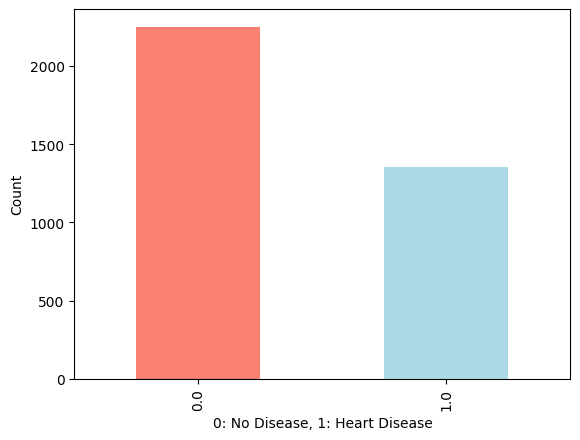

In [ ]:
data['CoronaryHeartDisease'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Disease, 1: Heart Disease')
plt.ylabel('Count');

In [ ]:
data['Gender'].value_counts()

1.0    1958
2.0    1650
Name: Gender, dtype: int64

In [ ]:
pd.crosstab(data['Gender'], data_null['CoronaryHeartDisease'])

CoronaryHeartDisease,0.0,1.0
Gender,,
1.0,1146,720
2.0,1230,336


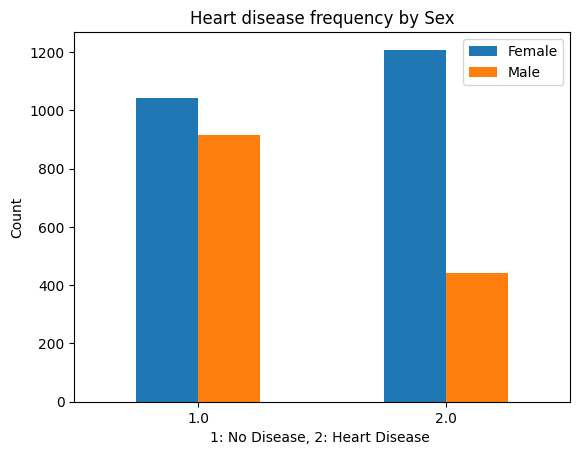

In [ ]:
pd.crosstab(data['Gender'], data['CoronaryHeartDisease']).plot(kind='bar');
plt.title('Heart disease frequency by Sex')
plt.xlabel('1: No Disease, 2: Heart Disease ')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

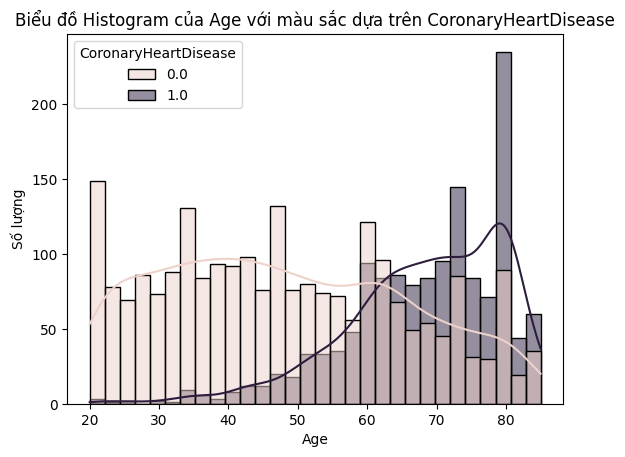

In [ ]:
sns.histplot(data=data_null, x='Age', bins=30, hue='CoronaryHeartDisease', kde=True)

# Đặt tiêu đề và label cho biểu đồ
plt.title('Biểu đồ Histogram của Age với màu sắc dựa trên CoronaryHeartDisease')
plt.xlabel('Age')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()


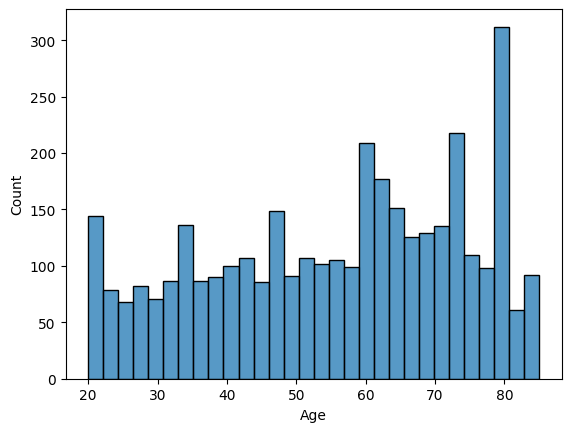

In [ ]:
sns.histplot(data=data, x=data['Age'], bins=30);

# Modelling

In [ ]:
data.head(2)

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,13693.0,2.0,43.0,10.0,5.0,96.0,120.0,85.0,112.3,159.5,...,4.55,1.01,5.5,2.0,1.0,1.0,2.0,1.0,1.0,0.0
1,7067.0,2.0,39.0,11.0,5.0,56.0,109.0,72.0,64.1,166.4,...,4.24,1.66,4.9,2.0,1.0,1.0,2.0,2.0,1.0,0.0


In [ ]:
# split features and labels
X = data.drop('CoronaryHeartDisease', axis=1)
y = data['CoronaryHeartDisease']

In [ ]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2886, 50), (722, 50), (2886,), (722,))

# Random Forest model for "Grid search"

In [ ]:
RANDOM_STATE = 101

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.random.seed(RANDOM_STATE)
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
parameter_grid = {'n_estimators': [80, 100, 120],
                 'max_depth': [5, 10, 15],
                 'max_features': [5, 6, 7]}
n_splits = 5

rf_model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = RANDOM_STATE)

# Initialize StratifiedKFold without setting random_state and with shuffle=True
strat_cv = StratifiedKFold(n_splits=n_splits, shuffle=True)

clf = GridSearchCV(estimator = rf_model,
                   param_grid = parameter_grid,
                   cv = strat_cv,
                   scoring = 'recall',
                   n_jobs = -1,
                  refit = True)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(random_state=101), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [5, 6, 7],
                         'n_estimators': [80, 100, 120]},
             scoring='recall')

In [ ]:
clf.best_estimator_

RandomForestClassifier(max_depth=15, max_features=7, random_state=101)

In [ ]:
clf.best_score_

0.7000954753009547

In [ ]:
clf.best_params_

{'max_depth': 15, 'max_features': 7, 'n_estimators': 100}

In [ ]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(5)

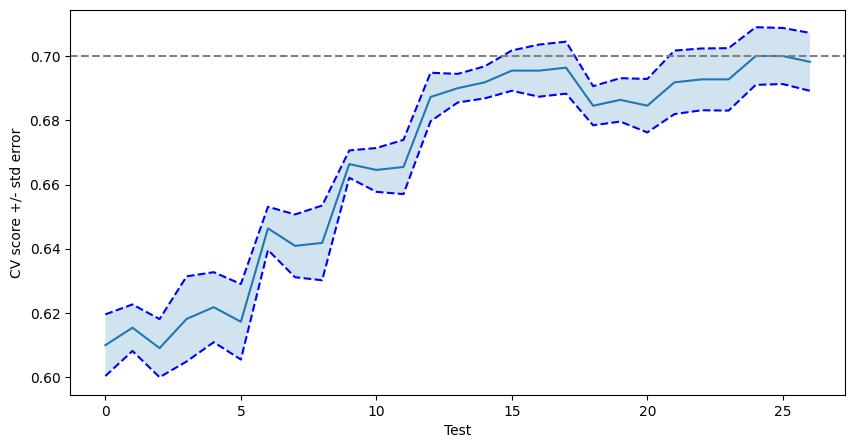

In [ ]:
plt.figure( figsize = (10, 5) )
plt.plot(scores)
plt.plot(scores + std_error, 'b--')
plt.plot(scores - std_error, 'b--')
# alpha=0.2 controls the translucency of the fill color
plt.fill_between(range(0,27), scores + std_error, scores - std_error, alpha = 0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('Test')
plt.axhline(np.max(scores), linestyle='--', color='.5')

**Feature importance analysis**

<Axes: >

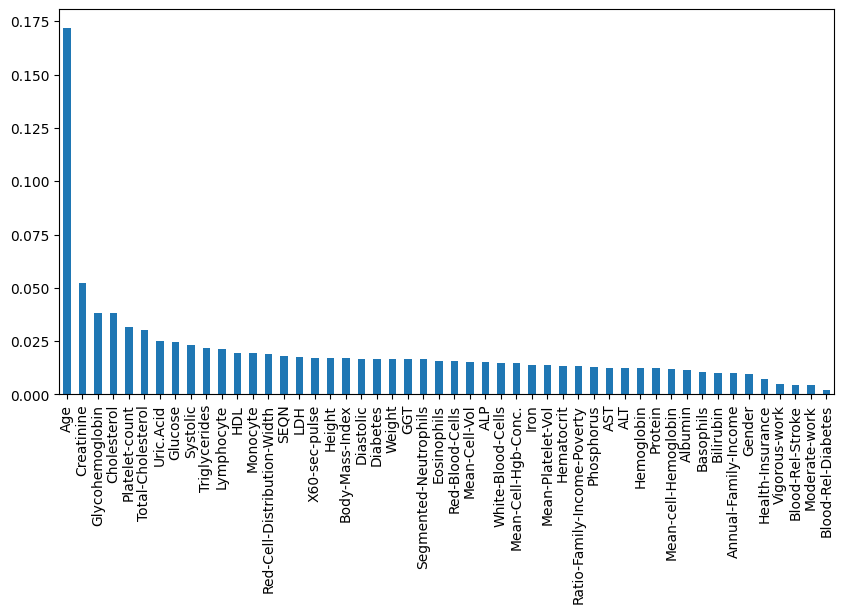

In [ ]:
var_importance = pd.Series(clf.best_estimator_.feature_importances_)
var_importance.index = X_train.columns
plt.figure( figsize = (10, 5) )
var_importance.sort_values(ascending = False).plot.bar()

**Findings:**

Important features are: **Age, Creatinine, Glycohemoglobin, Cholesterol, Platelet-count, Uric.Acid, Glucose
**

# Lọc Data


In [ ]:
columns_to_keep = ['Age', 'Creatinine', 'Glycohemoglobin', 'Cholesterol', 'Platelet-count', 'Uric.Acid','Glucose', 'CoronaryHeartDisease']

# Tạo DataFrame mới chỉ chứa các cột cần giữ lại
new_df = data[columns_to_keep]

# Lưu dữ liệu vào file mới (nếu cần)
new_df.to_csv('/content/data_with_importantFeature.csv', index=False)

In [ ]:
data_new = pd.read_csv('/content/data_with_importantFeature.csv')


In [ ]:
data_new_shuffled = data_new.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
data_new_shuffled.head(20)

,Age,Creatinine,Glycohemoglobin,Cholesterol,Platelet-count,Uric.Acid,Glucose,CoronaryHeartDisease
0,67.0,107.85,7.4,3.258,213.0,356.9,12.100,1.0
1,35.0,97.24,5.0,5.663,225.0,428.3,5.000,0.0
2,81.0,88.40,5.8,5.970,204.0,267.7,5.107,0.0
3,72.0,96.36,5.5,3.595,314.0,505.6,4.390,1.0
4,38.0,81.33,5.3,4.344,199.0,392.6,6.050,0.0
5,30.0,44.20,5.0,6.181,283.0,214.1,3.720,0.0
6,63.0,70.72,5.7,5.172,239.0,368.8,5.160,0.0
7,58.0,73.37,5.6,5.586,187.0,237.9,5.050,1.0
8,31.0,88.40,5.1,4.577,210.0,386.6,5.110,0.0
9,41.0,63.65,5.4,4.888,183.0,303.3,4.160,0.0


In [ ]:
data_new_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   3608 non-null   float64
 1   Creatinine            3608 non-null   float64
 2   Glycohemoglobin       3608 non-null   float64
 3   Cholesterol           3608 non-null   float64
 4   Platelet-count        3608 non-null   float64
 5   Uric.Acid             3608 non-null   float64
 6   Glucose               3608 non-null   float64
 7   CoronaryHeartDisease  3608 non-null   float64
dtypes: float64(8)
memory usage: 225.6 KB


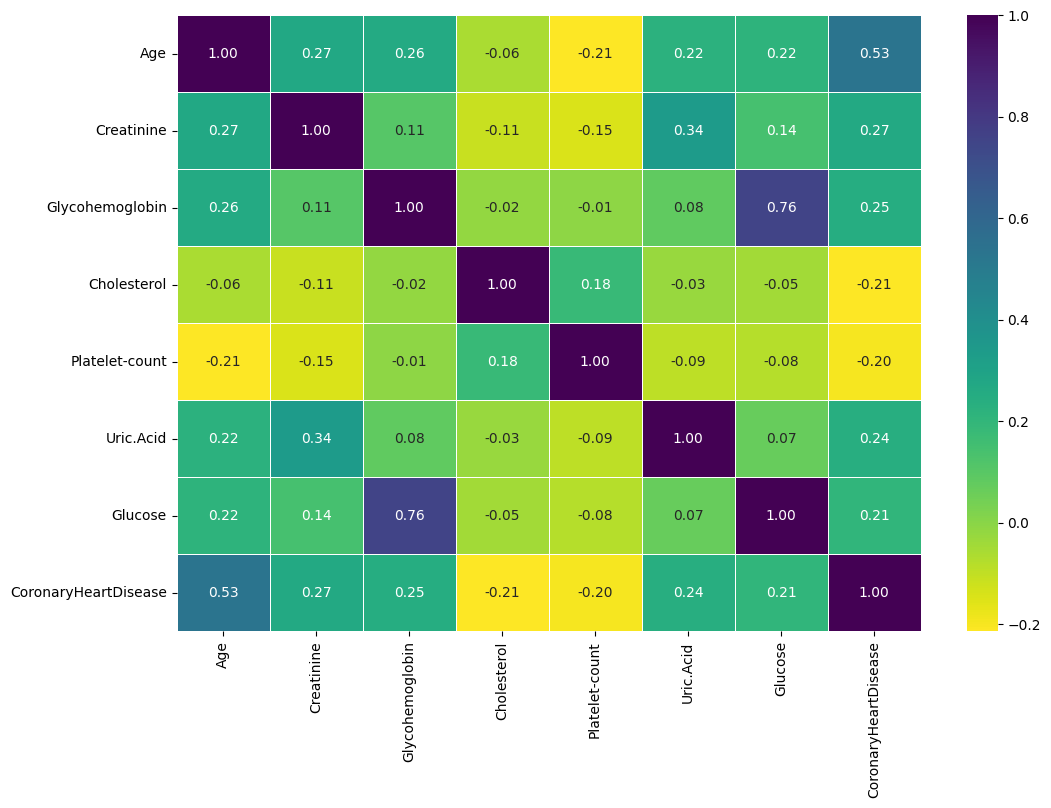

In [ ]:
# visualization
corr_matrix = data_new_shuffled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

# Model Training

In [ ]:
X = data_new_shuffled.drop('CoronaryHeartDisease', axis=1)
y = data_new_shuffled['CoronaryHeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# put models in dictionary

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """

    # set random seed
    np.random.seed(42)

    # make dictonary to keep scores
    model_scores = {}

    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model

    return model_scores

In [ ]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.7950138504155124,
 'KNN': 0.7576177285318559,
 'RandomForestClassifer': 0.7839335180055401}

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.795014,0.757618,0.783934


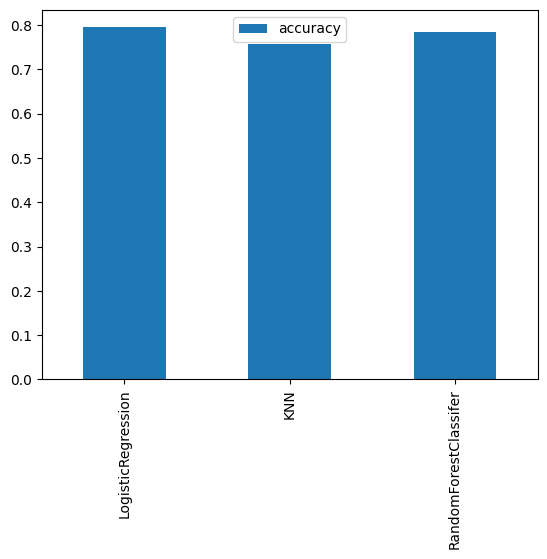

In [ ]:
model_compare.T.plot(kind='bar');

# Tuning or Improving our models

# Hyperparameter Tuning

In [ ]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                          log_reg_grid,
                                          cv=5,
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
# get best parameters
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [ ]:
# get the score
gs_log_reg.score(X_test, y_test)

0.7894736842105263

# Evaluating Models

In [ ]:
# make predictions
y_preds = gs_log_reg.predict(X_test)

In [ ]:
# # ROC curve and AUC
# plot_roc_curve(gs_log_reg, X_test, y_test);

In [ ]:
confusion_matrix(y_test, y_preds)

array([[389,  69],
       [ 83, 181]])

In [ ]:
# plot_confusion_matrix(gs_log_reg, X_test, y_test);

<Axes: >

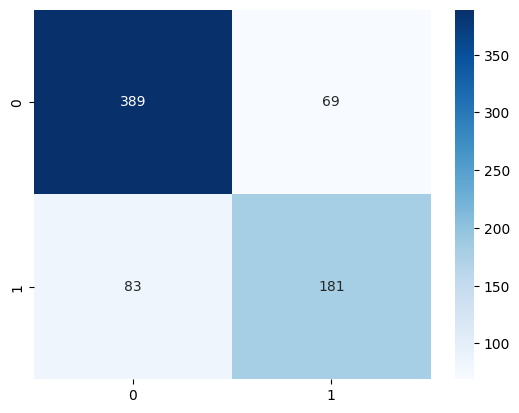

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
from tabulate import tabulate

report = classification_report(y_test, y_preds)
table = tabulate([row.split() for row in report.split('\n')], headers='firstrow', tablefmt='github')
print(table)

| precision   | recall   |   f1-score |   support |
|-------------|----------|------------|-----------|
|             |          |            |           |
| 0.0         | 0.82     |       0.85 |      0.84 |
| 1.0         | 0.72     |       0.69 |      0.7  |
|             |          |            |           |
| accuracy    | 0.79     |     722    |           |
| macro       | avg      |       0.77 |      0.77 |
| weighted    | avg      |       0.79 |      0.79 |
|             |          |            |           |


## Calculate evaluation metrics using Cross Validated Precision, Recall and F1 score

In [ ]:
# check current best parameter
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [ ]:
# create a new classifier with current best parameter
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
cv_accuracy

array([0.75484765, 0.75900277, 0.81163435, 0.7739251 , 0.80305132])

In [ ]:
# mean of cross valided accuracy
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.7804922372359104

In [ ]:
# Cross Validated Precision
cv_precision = cross_val_score(clf, X, y, scoring='precision', cv=5)

cv_precision = np.mean(cv_precision)
cv_precision

0.717228041575398

In [ ]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y, scoring='recall', cv=5)

cv_recall = np.mean(cv_recall)
cv_recall

0.6865557846754937

In [ ]:
# Cross Validated F1
cv_f1 = cross_val_score(clf, X, y, scoring='f1', cv=5)

cv_f1 = np.mean(cv_f1)
cv_f1

0.7005766545855451

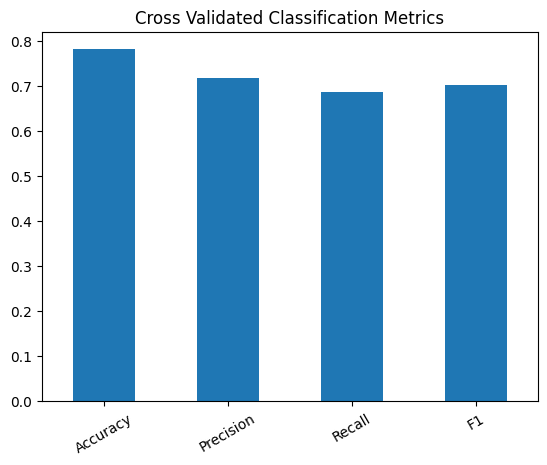

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                                            'Precision': cv_precision,
                                            'Recall': cv_recall,
                                            'F1': cv_f1},
                                             index=[0])

cv_metrics.T.plot.bar(legend=False);

plt.title('Cross Validated Classification Metrics')
plt.xticks(rotation=30);

## Feature Importance

In [ ]:
model = LogisticRegression(C=0.23357214690901212, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
# check Coefficient of features
model.coef_

array([[ 0.0644727 ,  0.00407362,  0.19177566, -0.42817544, -0.00431199,
         0.00187709, -0.00375054]])

In [ ]:
# Match coef's of features to columns name
feature_dict = dict(zip(data_new.columns, list(model.coef_[0])))

feature_dict

{'Age': 0.06447270179100581,
 'Creatinine': 0.004073619451994267,
 'Glycohemoglobin': 0.1917756623550619,
 'Cholesterol': -0.42817544018436104,
 'Platelet-count': -0.004311993933001734,
 'Uric.Acid': 0.00187709499508946,
 'Glucose': -0.003750544722774483}

In [ ]:
X.columns

Index(['Age', 'Creatinine', 'Glycohemoglobin', 'Cholesterol', 'Platelet-count',
       'Uric.Acid', 'Glucose'],
      dtype='object')



*   **Age**: Tuổi tác thường là một yếu tố nguy cơ cho bệnh tim mạch. Người có tuổi cao hơn thường có nguy cơ cao hơn mắc bệnh mạch vành. Tuổi tác cũng thường đi kèm với quá trình lão hóa mạch máu, làm tăng nguy cơ tắc nghẽn động mạch.
*   **Creatinine**: Creatinine thường được sử dụng để đánh giá chức năng thận. Bệnh thận có thể dẫn đến các vấn đề sức khỏe khác, và các nghiên cứu đã chỉ ra rằng bệnh thận có thể được liên kết với tăng nguy cơ mắc bệnh tim mạch.
*  **Glycohemoglobin**: Mức độ kiểm soát đường huyết, được đánh giá thông qua Glycohemoglobin (HbA1c), liên quan mật thiết đến bệnh tiểu đường. Người bị tiểu đường thường có nguy cơ cao hơn mắc bệnh tim mạch do tác động của đường huyết cao đối với mạch máu.
*   **Cholesterol**: Mức độ cholesterol cao, đặc biệt là mức cholesterol LDL (xấu), có thể dẫn đến tạo thành xơ vữa trong mạch máu, tăng nguy cơ tắc nghẽn động mạch và gây bệnh mạch vành.
*   **Platelet-count:** Số lượng tiểu cầu cao có thể gây ra hình thành cục máu và tăng nguy cơ các vấn đề tim mạch như đau thắt ngực và đột quỵ.
*   **Uric Acid:** Mức cao của uric acid có thể gây ra việc tích tụ của các tinh thể urate trong cơ thể, gây ra việc viêm khớp và nhiều rủi ro khác, có thể ảnh hưởng đến sức khỏe tim mạch.
*   **Glucose**: Mức độ glucose cao trong máu, như ở người mắc tiểu đường, có thể gây tổn thương mạch máu và gây ra bệnh tim mạch.






In [ ]:

def predict_Heart_Disease():
    age = float(input("Nhập tuổi: "))
    creatinine = float(input("Nhập Creatinine level: "))
    glycohemoglobin = float(input("Nhập Glycohemoglobin level: "))
    cholesterol = float(input("Nhập Cholesterol level: "))
    platelet_count = float(input("Nhập Platelet count: "))
    uric_acid = float(input("Nhập Uric Acid level: "))
    glucose = float(input("Nhập Glucose level: "))

    # Tạo vector input với các đặc trưng
    x = np.array([age, creatinine, glycohemoglobin, cholesterol, platelet_count, uric_acid, glucose]).reshape(1, -1)

    # Thực hiện dự đoán bằng mô hình đã được huấn luyện (gs_log_reg)
    return gs_log_reg.predict(x)[0]


# Gọi hàm để dự đoán
result = predict_Heart_Disease()
print("Kết quả dự đoán: ", result)


Nhập tuổi: 62
Nhập Creatinine level: 61.88
Nhập Glycohemoglobin level: 5.5
Nhập Cholesterol level: 4.6
Nhập Platelet count: 327
Nhập Uric Acid level: 237
Nhập Glucose level: 5.384
Kết quả dự đoán:  0.0


In [ ]:
data_new = pd.read_csv('/content/data_with_importantFeature.csv')
data_new[0:10]

,Age,Creatinine,Glycohemoglobin,Cholesterol,Platelet-count,Uric.Acid,Glucose,CoronaryHeartDisease
0,43.0,61.88,5.5,4.600,327.0,237.9,5.384,0.0
1,39.0,61.90,4.9,4.110,185.0,255.8,4.774,0.0
2,37.0,88.40,5.8,5.301,205.0,428.3,7.160,0.0
3,50.0,53.92,5.6,5.870,285.0,321.2,5.110,0.0
4,61.0,106.08,5.8,4.448,299.0,356.9,4.770,0.0
5,48.0,82.21,6.2,8.249,341.0,517.5,5.720,0.0
6,20.0,79.56,5.5,6.155,263.0,350.9,5.050,0.0
7,61.0,97.24,5.7,7.939,177.0,434.2,5.440,0.0
8,40.0,53.00,4.9,5.220,209.0,303.3,4.552,0.0
9,57.0,102.54,4.3,5.172,305.0,458.0,4.390,0.0
